0. **[Stuff](#0.-Stuff)**<br>
    0.1 [Imports](#0.1-Imports)<br>
    0.2 [Definitions](#0.2-Definitions)<br>
    0.3 [Functions](#0.3-Functions)<br>



# 0. Stuff

## 0.1 Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import straxbra
from matplotlib.ticker import AutoMinorLocator
from matplotlib.image import NonUniformImage
import pandas as pd
import patrick_stylez as ps
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import chi2 

Using TensorFlow backend.


## 0.2 Definitions

In [3]:
average_s1_log_gaus = []
average_s1_corrected_log_gaus = []
average_s1_error_log_gaus = []

average_s1_corrected_error_log_gaus = []
reduced_chi_squared_log_gaus = []
reduced_chi_squared_corrected_log_gaus = []

electron_lifetime_list = []
electron_lifetime_error_list = []

# def CutCondition(waveform):  
#     FirstPeak_area = sum(waveform[:15])
#     SecondPeak_area = sum(waveform[15:])
#     FirstPeak_maximum = max(waveform[:15])
#     SecondPeak_maximum = max(waveform[15:])
#     SecondPeak_index = np.where(waveform == SecondPeak_maximum)
#     SecondPeak_index_left = SecondPeak_index[0][0] -1
#     SecondPeak_index_right = SecondPeak_index[0][0] +1
#     SecondPeak_maximum_left = waveform[SecondPeak_index_left]
#     SecondPeak_maximum_right = waveform[SecondPeak_index_right]




#     if  FirstPeak_area > 100 and FirstPeak_area < 500 and SecondPeak_area > 40 and SecondPeak_area  < 200 \
#     and SecondPeak_maximum < 0.5 * FirstPeak_maximum \
#     and SecondPeak_maximum > 0.25 * FirstPeak_maximum \
#     and SecondPeak_maximum > waveform[SecondPeak_index_left] \
#     and SecondPeak_maximum > waveform[SecondPeak_index_right] \
#     : 
#         return(True)
#     else:
#         return(False)

def CutCondition(waveform):  
    FirstPeak_area = sum(waveform[:15])
    SecondPeak_area = sum(waveform[15:])    
    if  FirstPeak_area > 80 and FirstPeak_area < 500 and SecondPeak_area > 30 and SecondPeak_area  < 200:
#         print(FirstPeak_area)
#         print(SecondPeak_area)
        return(True)
    else:
        return(False)
    
    

def poisson_interval(k, alpha=0.318):
    a = alpha
    low, high = (chi2.ppf(a/2, 2*k) / 2, chi2.ppf(1-a/2, 2*k + 2) / 2)
    if k == 0:
        low = 0.0
    low_interval = k - low
    high_interval = high - k
    return low_interval, high_interval

def log_gaus(x, h, mu, sigma):

    log_gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return log_gaus

def gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

def expo(x, a, b):
    return a*np.exp(-b*x)

def linear(x,m,c):
    linear = m*x+c  
    return linear

def s1_correction(z):
    return (-0.0069 *z + 0.76)

def drifttime_to_z(t,ai, bi):
    return ai * t + bi

def S2_found(integral, width):
    #maximum_S2 = max(waveform)
    if integral > 500 and width >200 and width < 2000:
        return True
    else:
        return False
    
def Process(waveform,i, s1_list, z_list, aii, bii, timestamp): 
    SelectionCutFlag = CutCondition(waveform[i])
    if SelectionCutFlag == True:
        j = 1
        counter_timestamp = timestamp[i+j]
        threshold_timestamp = timestamp[i] + 45000
        while threshold_timestamp >= counter_timestamp and  S2_found(integral = integral[i+j], width = width[i+j]) == False:  
            j += 1
            counter_timestamp = timestamp[i+j]
        else:
            if S2_found(integral = integral[i+j], width = width[i+j]):
                k=1 
                s2_counter_timestamp = timestamp[i+j+k]
#                 print("ts:", timestamp[i+j] - timestamp[i])
#                 print("a:", aii)
#                 print("b:", bii)
                z_position = drifttime_to_z(t=(timestamp[i+j] - timestamp[i]), ai=aii, bi=bii)
#                 print('z_position_man', aii * (timestamp[i+j] - timestamp[i]) + bii)
#                 print('z_position_func',z_position)
                while threshold_timestamp >= s2_counter_timestamp and S2_found(integral = integral[i+j+k], width = width[i+j+k]) == False:
                    k += 1
                    s2_counter_timestamp = timestamp[i+j+k]
                else:

                    if threshold_timestamp <= s2_counter_timestamp and z_position >= -70 and z_position <= -5:
                        s1.append(integral[i])
                        z.append(z_position)
                        s1_corrected.append(integral[i]/(-0.0069 *z_position + 0.76))
                        time       = timestamp[i+j] - timestamp[i]
                        drifttime.append(time)
                        s2.append(integral[i+j])
                        
                        
                        for k in range(len(PMT_area_list)):
                            if area_per_channel[i+j][1] > 0 and area_per_channel[i+j][2] > 0 \
                            and area_per_channel[i+j][3] > 0 and area_per_channel[i+j][4] > 0 \
                            and area_per_channel[i+j][5] > 0 and area_per_channel[i+j][6] > 0 \
                            and area_per_channel[i+j][7] > 0 \
                            :
                                PMT_area_list[k].append(area_per_channel[i+j][k+1])
                                sum_area = sum(area_per_channel[i+j][1:8])   
                                sample_list = []
                                for m in range(len(area_per_channel[i+j][1:8])):
                                    sample_list.append(float(area_per_channel[i+j][1:8][m]))
                                sum_area = sum(sample_list)

                                for n in range(len(PMT_area_list)):
                                    if sum_area > area_per_channel[i+j][n+1]:
                                        PMT_area_fraction_list[n].append((area_per_channel[i+j][n+1])/sum_area)
                                    
                        return
                    else:
                        return
                return
            else:
                return
    else:
        return
    

    
def compute_lifetime(s2,drifttime):

    
    bins_x = np.linspace(0,50,40)
    bins_y = np.logspace(2,5,40) 
    drifttime = np.array(drifttime)
    counts, xedges, yedges = np.histogram2d(drifttime/1e3, s2, bins=(bins_x, bins_y))
    ycenter = ((yedges[:-1]+yedges[1:])/2)
    poisson_list = []
    for i in counts:
        error_per_slice = []
        for j in i:
            u =poisson_interval(j)[1]
            error_per_slice.append(u)
        poisson_list.append(error_per_slice)
        
    fit_range= np.linspace(10,30000,1000)

    

    p0 = [50,8,2]

    expectation_list = []
    error_list = []
    for i in range(5,30):   
        popt, pcov = curve_fit(log_gaus, ycenter, counts[i], p0= p0, sigma = poisson_list[i], absolute_sigma = True, maxfev = 10000)
        perr = np.sqrt(np.diag(pcov))

        expectation = np.exp(popt[1]+((popt[2]**2)/2))
        expectation_list.append(expectation)

    
        diff_mu = expectation
        diff_sigma = expectation*popt[2]
        error_mu = perr[1]
        error_sigma = perr[2]
    
        error = np.sqrt(diff_mu**2 * error_mu**2 + diff_sigma**2 * error_sigma**2)
        error_list.append(error)
    
 
    p1=  [10000,0.1]
    x = np.linspace(5,30,25)
    popt, pcov = curve_fit(expo, x, expectation_list, sigma=error_list, p0=p1, absolute_sigma=True, maxfev= 10000)
    perr = np.sqrt(np.diag(pcov))
    lifetime =(1/popt[1])
    lifetime_error =(1/(popt[1]**2))*perr[1]
#    print('electron lifetime: ', lifetime, '+/-', lifetime_error)
    
    return (lifetime, lifetime_error)

In [4]:
left_edge  = [0, 0]
right_edge = [40500.0, -71.5]
a = ((right_edge[1])-(left_edge[1])) / ((right_edge[0])-(left_edge[0]))
b = (right_edge[1]) - a * (right_edge[0])
fiducial_r = 23
shape = -0.0069
offset = 0.76

In [6]:
s1_all = {}
s1_corrected_all = {}
z_positions_all = {}
PMTs_all_runs = {}
PMTs_fraction_all_runs = {}

s2_all = {}
drifttime_all = {}
#run_list = ['00063','00071','00080','00082','00090','00095','00099','00158','00160','00163','00186','00187','00189','00192','00217','00220','00225','00230','00235','00237','00240','00242','00245','00248','00250']
run_list = ['00250']

for run in run_list:

    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    ts = peaks_data['time']
    area_per_channel = peaks_data['area_per_channel']

    Area_s2_PMT1 = []
    Area_s2_PMT2 = []
    Area_s2_PMT3 = []
    Area_s2_PMT4 = []
    Area_s2_PMT5 = []
    Area_s2_PMT6 = []
    Area_s2_PMT7 = []
    
    Area_fraction_s2_PMT1 = []
    Area_fraction_s2_PMT2 = []
    Area_fraction_s2_PMT3 = []
    Area_fraction_s2_PMT4 = []
    Area_fraction_s2_PMT5 = []
    Area_fraction_s2_PMT6 = []
    Area_fraction_s2_PMT7 = []
    PMT_area_list = [Area_s2_PMT1, Area_s2_PMT2,Area_s2_PMT3,Area_s2_PMT4,Area_s2_PMT5,Area_s2_PMT6,Area_s2_PMT7]
    PMT_area_fraction_list = [Area_fraction_s2_PMT1, Area_fraction_s2_PMT2,Area_fraction_s2_PMT3,Area_fraction_s2_PMT4,Area_fraction_s2_PMT5,Area_fraction_s2_PMT6,Area_fraction_s2_PMT7]
    
    
    z = []
    s1 = []
    s1_corrected = []
    s2 = []
    drifttime = []


    num = len(waveform)
    print_counter = 0.0
    for i in range(0,num-10):    
        Process(waveform,i, s1_list=s1, z_list=z, aii=a, bii=b, timestamp=ts)
        if i/num >= print_counter:
            print(round(print_counter,2), end = ' ')
            print_counter += 0.1
    print(1.0, '        Run ',run, 'done!')
    
    electron_lifetime, lifetime_error = compute_lifetime(s2,drifttime) 
    electron_lifetime_list.append(electron_lifetime)
    electron_lifetime_error_list.append(lifetime_error)
    z_positions_all.update({run:z})
    s1_all.update({run:s1})
    s1_corrected_all.update({run:s1_corrected})
    s2_all.update({run:s2})
    drifttime_all.update({run:drifttime})
    #fig, axes = ps.styles()
    
    p0 =[500,300,50]
    p0_log = [1,1,1]
    

        
    n, binEdges = np.histogram(s1, bins=np.linspace(100,550,100))
    #print(n)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    
    poisson_list = []
    for i in n:
        q= poisson_interval(i)[1]
        poisson_list.append(q)
        
    popt, pcov = curve_fit(log_gaus, bincenters, n, p0_log,  sigma = poisson_list, absolute_sigma = True, maxfev = 10000)
    perr = np.sqrt(np.diag(pcov))
    expectation = np.exp(popt[1]+((popt[2]**2)/2))
    diff_mu = expectation
    diff_sigma = expectation*popt[2]
    error_mu = perr[1]
    error_sigma = perr[2]   
    error = np.sqrt(diff_mu**2 * error_mu**2 + diff_sigma**2 * error_sigma**2)
    xdata=bincenters[1:-1]
    ydata=n[1:-1]
    chi_squared =  (np.sum((n - log_gaus(bincenters, *popt))**2 / np.array(poisson_list)**2))
    Reduced_chi_squared ="%.2f" %( chi_squared / len(xdata))
    
    average_s1_log_gaus.append(expectation)
    average_s1_error_log_gaus.append(error)
    reduced_chi_squared_log_gaus.append(Reduced_chi_squared)
    
    
    
    
    n_corrected, binEdges_corrected = np.histogram(s1_corrected, bins=np.linspace(100,550,100))
    bincenters_corrected = 0.5 * (binEdges_corrected[1:] + binEdges_corrected[:-1])
    
    poisson_list = []
    for i in n:
        q= poisson_interval(i)[1]
        poisson_list.append(q)
        
    popt_corrected, pcov_corrected = curve_fit(log_gaus, bincenters_corrected, n_corrected, p0_log,  sigma = poisson_list, absolute_sigma = True, maxfev = 10000)
    perr_corrected = np.sqrt(np.diag(pcov_corrected))
    expectation_corrected = np.exp(popt_corrected[1]+((popt_corrected[2]**2)/2))
    diff_mu_corrected = expectation_corrected
    diff_sigma_corrected = expectation_corrected*popt_corrected[2]
    error_mu_corrected = perr_corrected[1]
    error_sigma_corrected = perr_corrected[2]   
    error_corrected = np.sqrt(diff_mu_corrected**2 * error_mu_corrected**2 + diff_sigma_corrected**2 * error_sigma_corrected**2)
    
    
    xdata_corrected=bincenters_corrected[1:-1]
    ydata_corrected=n_corrected[1:-1]
    chi_squared_corrected =  (np.sum((n_corrected - log_gaus(bincenters_corrected, *popt_corrected))**2 / np.array(poisson_list)**2))
    Reduced_chi_squared_corrected ="%.2f" %( chi_squared_corrected / len(xdata_corrected))
    
#     popt_corrected, pcov_corrected = curve_fit(gaus, bincenters_corrected, n_corrected,p0,  sigma = poisson_list, absolute_sigma = True, maxfev = 10000)
#     perr_corrected = np.sqrt(np.diag(pcov_corrected))
#     expectation_corrected = popt_corrected[1]
#     error_corrected = perr_corrected[1]
#     chi_squared_corrected =  (np.sum((n_corrected - gaus(bincenters_corrected, *popt_corrected))**2 / np.array(poisson_list)**2))
#     Reduced_chi_squared_corrected ="%.2f" %( chi_squared_corrected / len(xdata_corrected))
    
    average_s1_corrected_log_gaus.append(expectation_corrected)
    average_s1_corrected_error_log_gaus.append(error_corrected)
    reduced_chi_squared_corrected_log_gaus.append(Reduced_chi_squared_corrected)
    
#     s1_mu_corrected = f"{expectation_corrected:.1f}"
#     s1_error_corrected = f"{error_corrected:.1f}"
#     x_range_corrected = np.linspace(100,550,1000)
#     axes.errorbar(bincenters_corrected, n_corrected, yerr=poisson_list,marker = 'x', fmt='.',c = 'C7',markersize='10', ecolor='red', label='Average s1')
#     axes.plot(x_range_corrected,log_gaus(x_range_corrected,*popt_corrected), color = 'k', linestyle = '-.', label = 'mu = ('+s1_mu_corrected+ ' +/- '+s1_error_corrected+') pe')
#     axes.plot([], [], ' ', label="reduced chi squared: "+Reduced_chi_squared_corrected)
#     axes.set_title('Average s1 for the kr83m 41.5keV population - Run '+run[2:])
#     axes.set_ylabel('Counts [#]')
#     axes.set_xlabel('Average s1 area [pe]')
#     axes.legend(loc = 1, prop={'size': 15})
#     plt.show()

0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0         Run  00250 done!


In [5]:
# print(reduced_chi_squared_corrected_log_gaus)
# print(reduced_chi_squared_log_gaus)
print(electron_lifetime_list)
print(electron_lifetime_error_list)
# print(average_s1_corrected_log_gaus)



[501.0255408042362, 74.27265221718727, 197.4776844771956, 113.00212367977491, 1021.3856397934682, 92.88845602361121, 78.99857988400423, 624.4637724112255, 138.92972309764548, 510.16242495824326, 131.47670344365466, 136.63380312763397, 157.60959673721013, 106.55158921240185, 129.160373199264, 35.07620532327094, 8.750258725395492, 9.739694102789883, 20.259890019176666, 27.05380379163973, 36.92213275557339, 44.09061079243939, 51.62794917965844, 58.675840710179266, 62.620538951647326]
[125.10241856005426, 6.933834248513605, 47.736461843447216, 17.31943529172041, 1024.9191381508322, 7.490785494679713, 2.672378265448972, 107.95379514959221, 11.397251220707464, 63.475245493272894, 8.387652890468978, 10.944172068948745, 32.791506773193994, 9.628907056980063, 8.060250863416714, 0.6512247263587703, 0.049385917678912726, 0.05812713268643108, 0.2191456173683222, 0.3687462184255569, 0.7018308959788802, 0.9570380056959865, 1.297346768349099, 1.7397460227859725, 1.9965047854215905]


# Electron lifetime calculated individually

In [6]:
EL_list = [438,441,413,565,527, 88, 81,576,140,497,129,135,155,107,133,35,8.79,9.78, 20.2,27.0,36.9,44,51,59,62]
EL_error_list = [96,161,149,349,263, 7,3,91,11, 60,8,11,32,10,9,1,0.05,0.06,0.2,0.4,0.7,1,1,2,2]
print(len(EL_error_list))

25


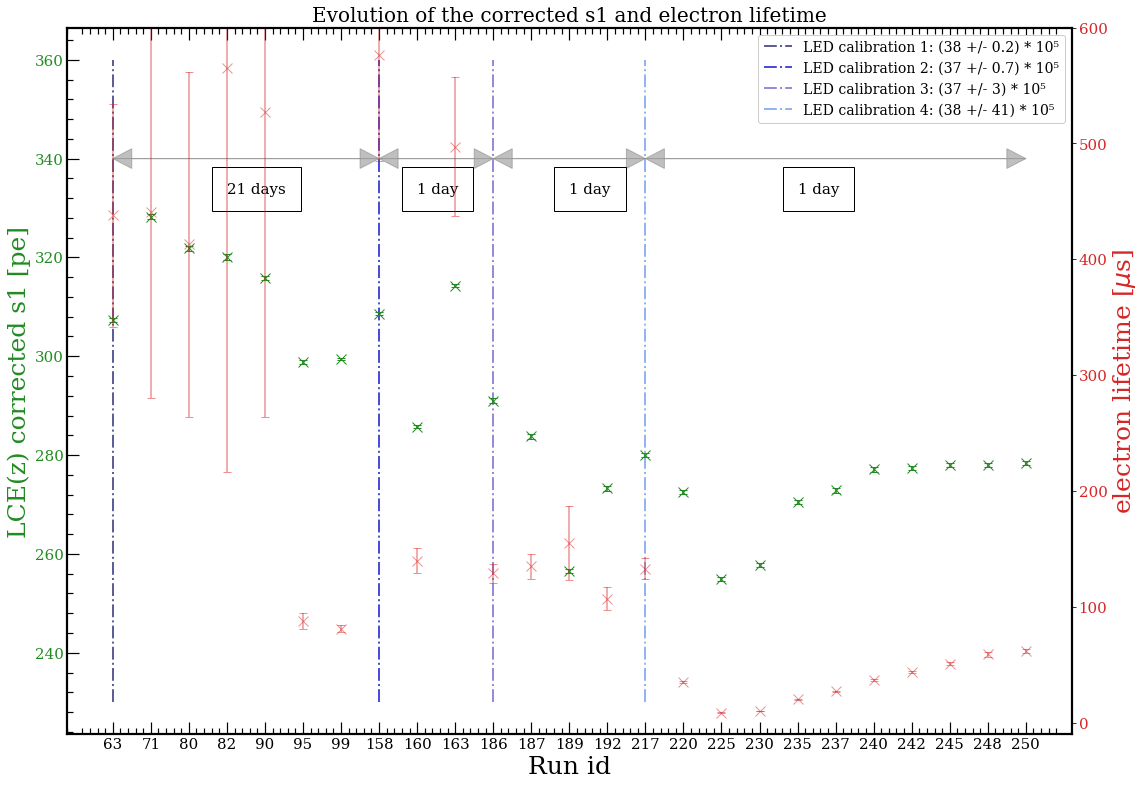

In [12]:
# fig,axes = ps.styles()
fig, axes = plt.subplots(figsize=(18,13))
plt.rc('font', family='serif')
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=25)

label_size = 15 #25
label_pad = 13 #10
title_size = 39 #30
title_pad = 26 #20
axes = plt.gca()
axes.tick_params(axis='both')
for axis in ['top', 'bottom', 'left', 'right']:
    axes.spines[axis].set_linewidth(2.2)
axes.xaxis.set_minor_locator(AutoMinorLocator(5)) 
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
axes.yaxis.set_minor_locator(AutoMinorLocator(5))
plt.tick_params(which='minor', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=6)
plt.tick_params(which='major', direction='in', labelsize=label_size, top=True, right=True, width=1.2, length=12)



positions = (1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25)
# positions_electron_lifetime = positions[15:]

labels =('63','71','80','82','90','95','99','158','160','163','186','187','189','192','217','220','225','230','235','237','240','242','245','248','250')
# labels_electron_lifetime = labels[15:]
# values_electron_lifetime_list = electron_lifetime_list[15:]
# error_electron_lifetime_error_list = electron_lifetime_error_list[15:]

plt.xticks(positions, labels)



axes.errorbar(positions,average_s1_corrected_log_gaus , yerr=average_s1_corrected_error_log_gaus, marker = 'x', fmt='.',c = 'forestgreen',markersize='10', ecolor='forestgreen',capsize=4, label = 'data')
plt.arrow(positions[0], 340, positions[6], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)
plt.arrow(positions[7], 340, -positions[6], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)

plt.arrow(positions[7], 340, positions[2], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)
plt.arrow(positions[10], 340, -positions[2], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)

plt.arrow(positions[10], 340, positions[3], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)
plt.arrow(positions[14], 340, -positions[3], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)

plt.arrow(positions[14], 340, positions[9], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)
plt.arrow(positions[24], 340, -positions[9], 0, head_width=4, head_length=0.5, linewidth=1, color='grey', length_includes_head=True, alpha = 0.5)


axes.tick_params(axis='y', labelcolor='tab:red')
axes.vlines(x = positions[0], ymin = 230, ymax =360, linestyle = '-.', linewidth = 2, alpha = 0.7, color = 'midnightblue', label ='LED calibration 1: (38 +/- 0.2) * 10⁵') 
axes.vlines(x = positions[7], ymin = 230, ymax =360, linestyle = '-.', linewidth = 2, alpha = 0.7, color = 'mediumblue', label ='LED calibration 2: (37 +/- 0.7) * 10⁵') 
axes.vlines(x = positions[10], ymin = 230, ymax =360, linestyle = '-.', linewidth = 2, alpha = 0.7, color = 'slateblue', label ='LED calibration 3: (37 +/- 3) * 10⁵')
axes.vlines(x = positions[14], ymin = 230, ymax =360, linestyle = '-.', linewidth = 2, alpha = 0.7, color = 'cornflowerblue', label ='LED calibration 4: (38 +/- 41) * 10⁵') 
axes.text(positions[3], 333, '21 days',fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 15})
axes.text(positions[8], 333, '1 day',fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 15})
axes.text(positions[12], 333, '1 day',fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 15})
axes.text(positions[18], 333, '1 day',fontsize=15, bbox={'facecolor': 'white', 'alpha': 1, 'pad': 15})



axes2 = axes.twinx()

axes2.errorbar(positions,EL_list, yerr= EL_error_list, marker = 'x', fmt='.',c = 'tab:red',markersize='10', ecolor='tab:red',alpha = 0.5,capsize=4, label = 'electron lifetime')


axes.tick_params(axis='y', labelcolor='forestgreen')

axes2.tick_params(axis='y', labelcolor='tab:red')
axes2.set_ylim([-10,600])
axes2.yaxis.set_tick_params(labelsize=15)
axes.set_title('Evolution of the corrected s1 and electron lifetime', fontsize = 20)
axes.set_xlabel('Run id')
axes.set_ylabel('LCE(z) corrected s1 [pe]', color ='forestgreen' )
axes2.set_ylabel('electron lifetime [$\mu$s]', color ='tab:red')
handles,labels = axes.get_legend_handles_labels()
handles = [handles[0],handles[1],handles[2],handles[3]]
labels = [labels[0],labels[1],labels[2],labels[3]]
axes.legend(handles,labels, loc = 1,prop={'size': 14}, fancybox=True, framealpha=1)
plt.show()

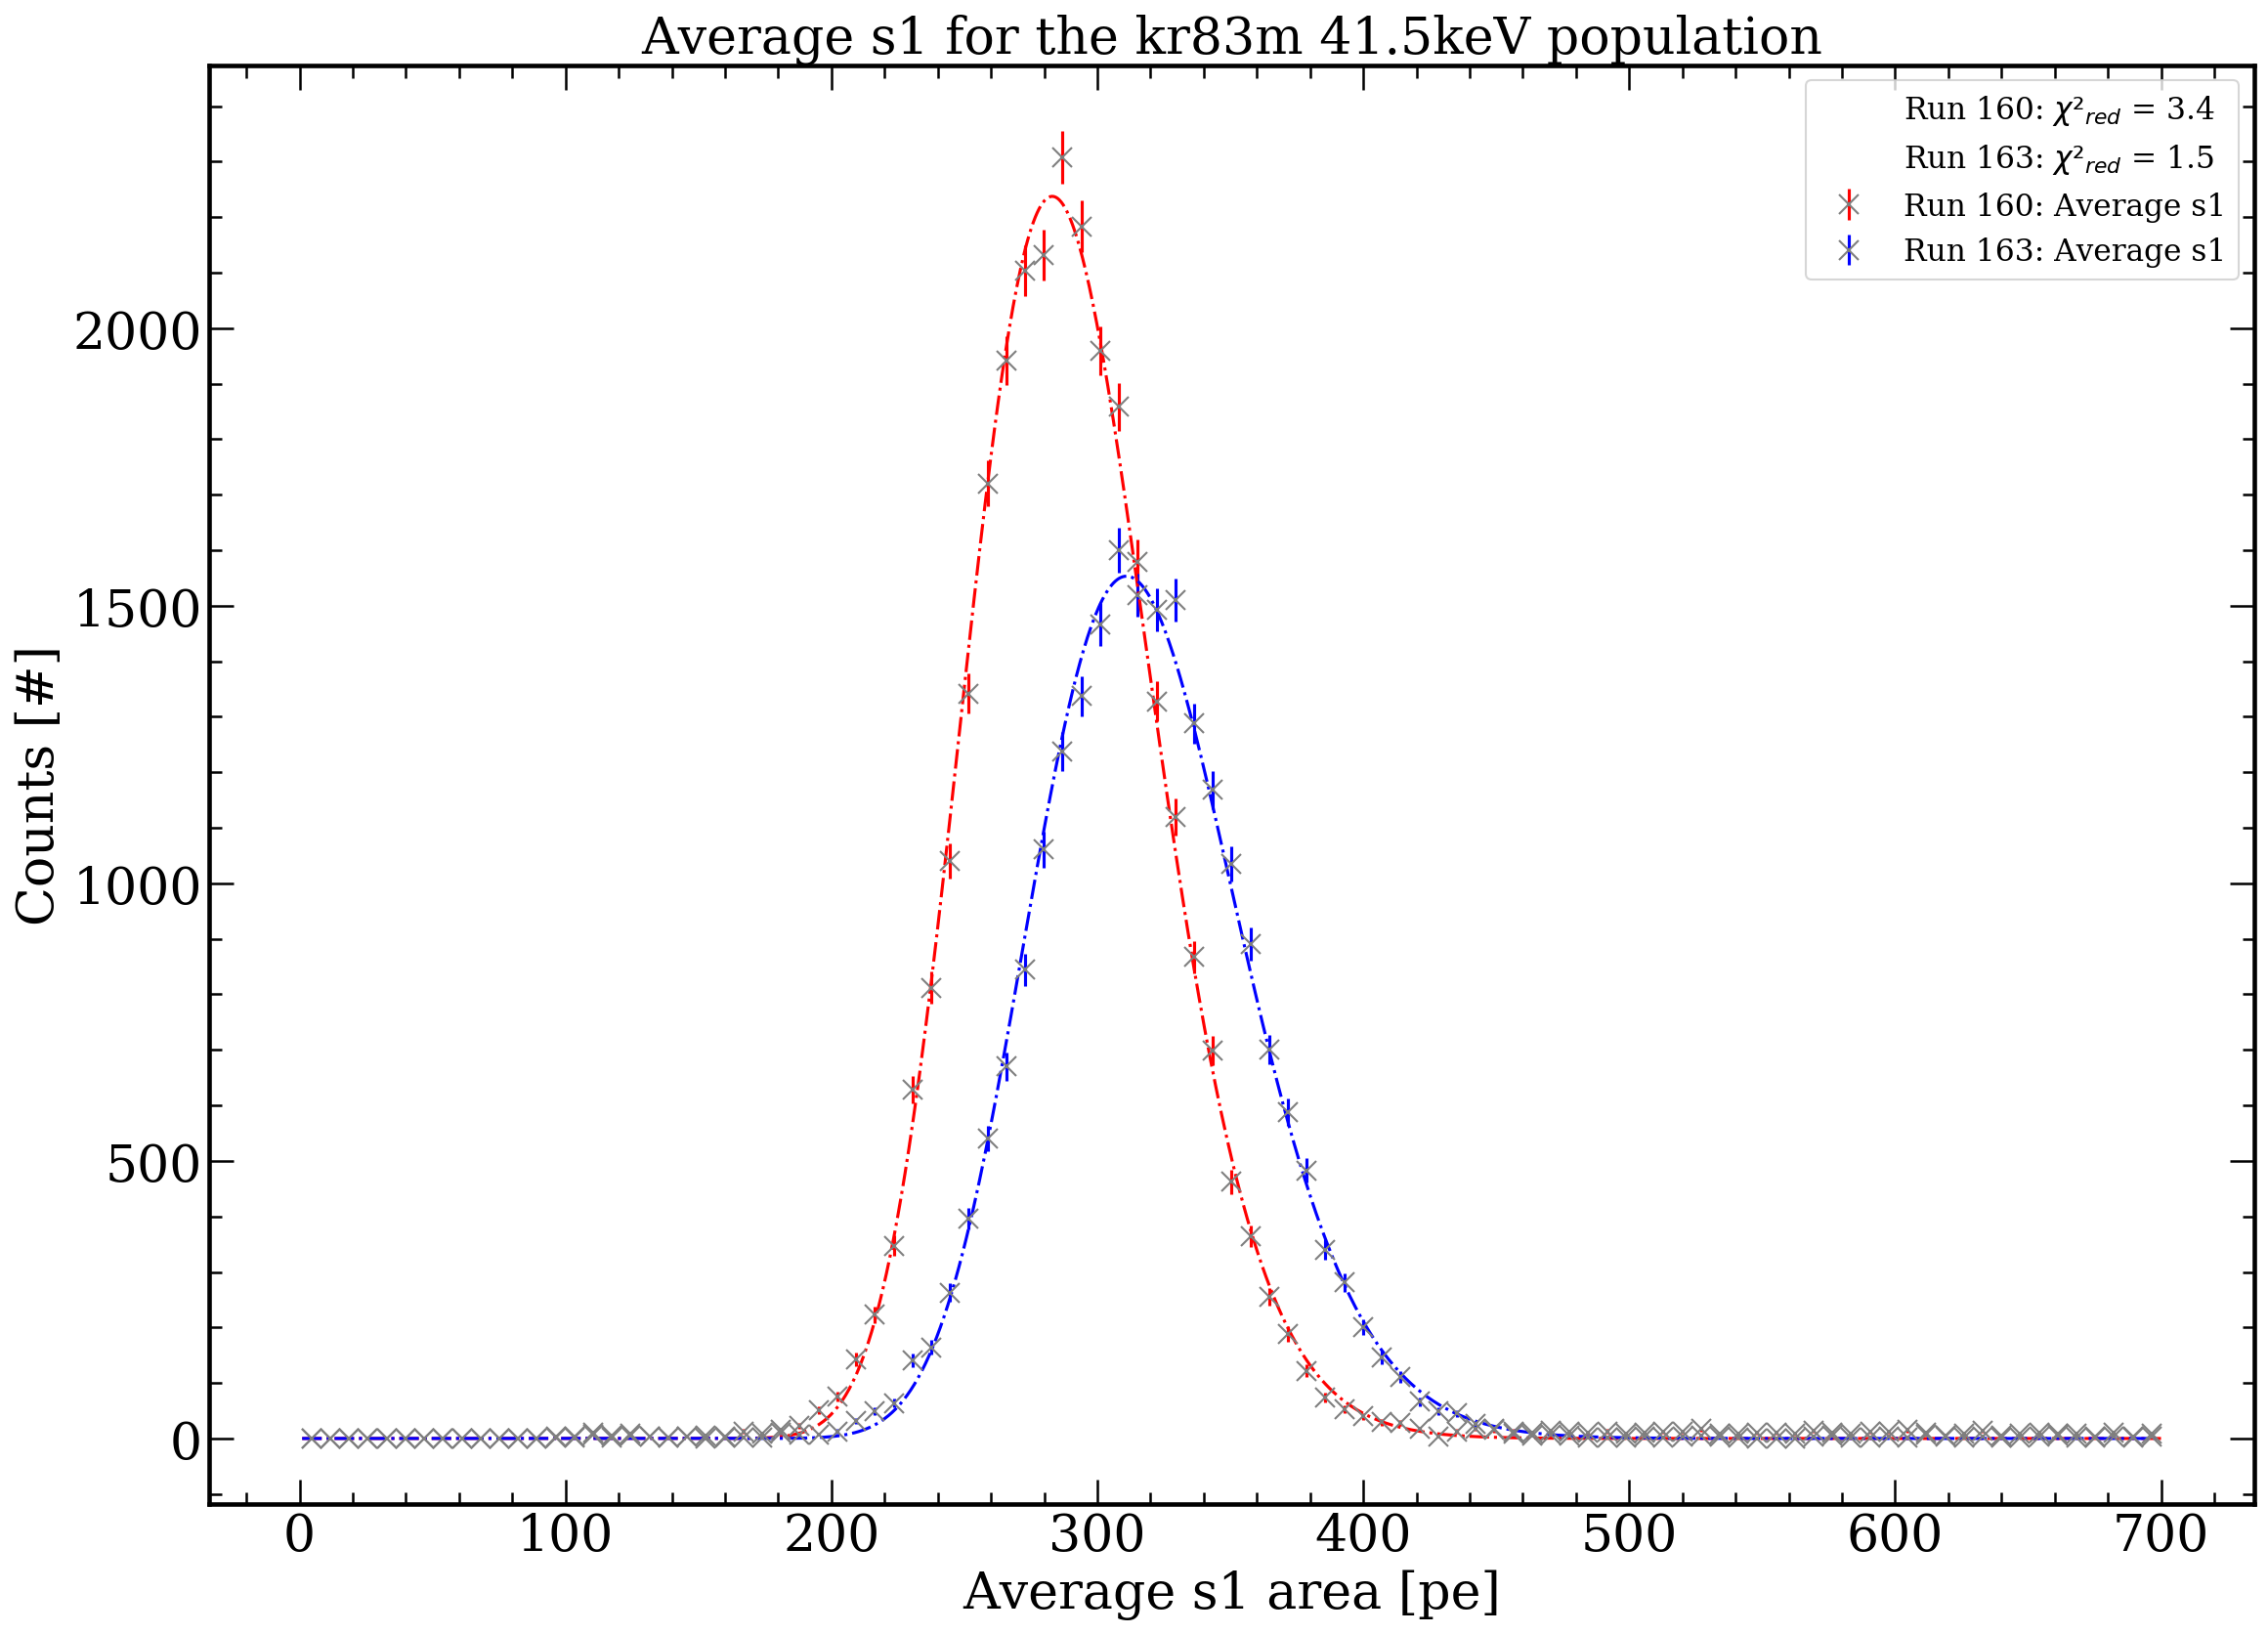

In [13]:
fig, axes = ps.styles()

p0_log = [1,1,1]
p0 = [500,300,60]

run_id_list = ['00160', '00163']
color_list = ['red','blue']
for run_id in run_id_list:
    
    n, binEdges = np.histogram(s1_corrected_all[run_id], bins=np.linspace(1,700,100))  #anode at 2500V

    poisson_list = []

    for i in n:
        q= poisson_interval(i)[1]
        poisson_list.append(q)


    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    x_range = np.linspace(1,700,1000)

    popt, pcov = curve_fit(log_gaus, bincenters, n, p0_log,  sigma = poisson_list, absolute_sigma = True, maxfev = 10000)
    perr = np.sqrt(np.diag(pcov))




    expectation = np.exp(popt[1]+((popt[2]**2)/2))
    diff_mu = expectation
    diff_sigma = expectation*popt[2]
    error_mu = perr[1]
    error_sigma = perr[2]   
    error = np.sqrt(diff_mu**2 * error_mu**2 + diff_sigma**2 * error_sigma**2)

    s1_mu = f"{expectation:.1f}"


# s1_ly = f"{(np.array(expectation)/41.5):.2f}"
# s1_ly_error = f"{(np.array(error)/41.5):.2f}"
# print('average ly of run',run[2:],': (',s1_ly,'+/-',s1_ly_error,')','keV/pe')
# s1_error = f"{error:.1f}"




    xdata=bincenters[1:-1]
    ydata=n[1:-1]
    chi_squared =  (np.sum((n - log_gaus(bincenters, *popt))**2 / np.array(poisson_list)**2))
    Reduced_chi_squared ="%.1f" %( chi_squared / len(xdata))
# print(Reduced_chi_squared)


    axes.plot([], [], ' ', label='Run '+str(run_id[2:])+    ': $\chi²_{red}$ = '        +Reduced_chi_squared)
    axes.errorbar(bincenters, n, yerr=np.sqrt(n),marker = 'x', fmt='.',c = 'C7',markersize='10',ecolor=color_list[run_id_list.index(run_id)], label=str('Run '+run_id[2:])+': Average s1')
    axes.plot(x_range,log_gaus(x_range,*popt), color = color_list[run_id_list.index(run_id)], linestyle = '-.')
    


    axes.legend(loc = 1, prop={'size': 15})


axes.set_title('Average s1 for the kr83m 41.5keV population')
axes.set_ylabel('Counts [#]')
axes.set_xlabel('Average s1 area [pe]')
plt.show()
